### General Information:
This data is taken from UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Online+Retail+II).
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers. There are 1067371 transactions and 8 attributes in this dataset. We try to extract some insights from transaction history.

### Features:
InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal. The name of the country where a customer resides.

In [1]:
## Import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Read data from 2 csv files, and concatenate them
data_1 = pd.read_csv('online_retail_2009_2010.csv')
data_2 = pd.read_csv('online_retail_2010_2011.csv')
data = pd.concat([data_1, data_2])
print(len(data))
print(data.columns)

1067371
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [3]:
## Check how data looks like
data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [4]:
## Check presence of Null values for different attributes. 
data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [5]:
## Check statistics of numeric attributes
data.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


It turns out that there are some negative values for Price and Quantity. Negative values under Quantity refer to product returns. However, negative values under Price does not make sense, actually they correspond to "Adjust bad debt", so we drop those transactions (only 5). Also, as described under atrribute Invoice, if it starts with 'C' it means cancellation. So, we need to find and drop these transactions (19494 transactions).  

In [6]:
data[data['Invoice'].str.startswith('C')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,12/1/2009 10:33,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,12/1/2009 10:33,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,12/1/2009 10:33,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,12/1/2009 10:33,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,12/1/2009 10:33,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [7]:
data[data['Price'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,4/29/2010 13:36,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,7/19/2010 11:24,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,10/20/2010 12:04,-38925.87,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [8]:
data = data[~data['Invoice'].str.startswith('C')]
data = data[data['Price'] >= 0]
len(data)

1047872

### Total sales from different countries

In [11]:
## Add an attribute for total transaction sale, by multiplying quantity and price
data['Total_Sale'] = data['Quantity'] * data['Price']
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Sale
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom,30.0


In [12]:
## Group data by country and sum over sales in each country
df_country = data.groupby(['Country']).sum().reset_index()
df_country.drop(['Customer ID', 'Price', 'Quantity'], axis=1, inplace=True)
df_country

,Country,Total_Sale
0,Australia,1.699681e+05
1,Austria,2.361301e+04
2,Bahrain,3.109790e+03
3,Belgium,6.575342e+04
4,Bermuda,1.253140e+03
5,Brazil,1.411870e+03
6,Canada,4.883040e+03
7,Channel Islands,4.499676e+04
8,Cyprus,2.498013e+04
9,Czech Republic,8.267400e+02


#### Total Sale by Country
The total sale in United Kingdom is by far bigger than other countries, which makes sense as the company is a UK-based company. So, we would exlude United Kingdom for the bar chart. For the sake of bar chart, we also take out the countries with total sales less than 10,000 Â£ (they have relatively insignificant contribution to the company revenue). The bar chart shows remarkable sales from EIRE (Republic of Ireland), Netherlands, Germany, and France. Looking at the world map, these countries are the closest European countries to UK. 

In [13]:
df_country = df_country[(df_country['Total_Sale'] > 10000) & (df_country['Total_Sale'] < 1000000)].reset_index(drop=True)

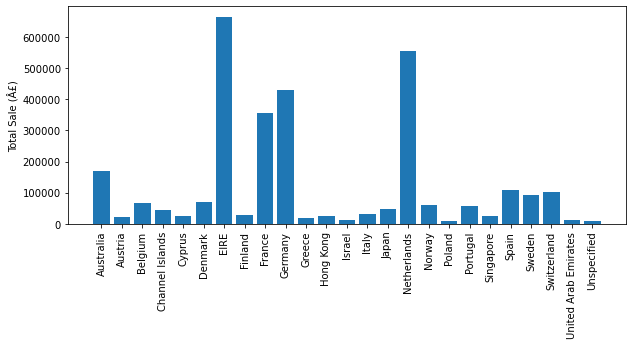

In [24]:
plt.figure(figsize=(10, 4))
plt.bar(x=df_country['Country'], height=df_country['Total_Sale'])
plt.xticks(rotation=90);
plt.ylabel('Total Sale (Â£)');

### Company sales month by month

In [15]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month

In [45]:
## Group data by year and month
df_yearmonth = data.groupby(['Year', 'Month']).sum().reset_index()
df_yearmonth.drop(['Quantity', 'Price', 'Customer ID'], axis=1, inplace=True)

year_month = []
for i in range(len(df_yearmonth)):
    year_month.append(str(df_yearmonth['Year'][i]) + '_' + str(df_yearmonth['Month'][i]))
df_yearmonth['year_month'] = year_month
df_yearmonth.head()

,Year,Month,Total_Sale,Hour,year_month
0,2009,12,825685.760,595025,2009_12
1,2010,1,652708.502,399536,2010_1
2,2010,2,553339.736,376429,2010_2
3,2010,3,833570.131,526585,2010_3
4,2010,4,681528.992,427858,2010_4


Text(0, 0.5, 'Total Sale (Â£)')

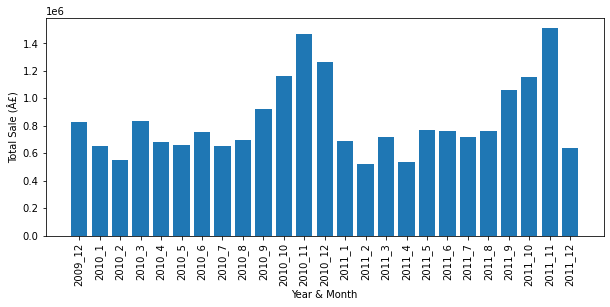

In [21]:
plt.figure(figsize=(10, 4))
plt.bar(x=df_yearmonth['year_month'], height=df_yearmonth['Total_Sale'])
plt.xticks(rotation=90);
plt.xlabel('Year & Month')
plt.ylabel('Total Sale (Â£)')

In [20]:
print(max(data['InvoiceDate']))

2011-12-09 12:50:00


The bar chart shows that sales pick up towards the end of the year, i.e. from September and the highest level of sales occurs in November. This company sells unique all-occasion gift-ware, and towards the year-end, demands for gifts siginificantly grow. (The total sale in December 2011 is lower than what we expect from this trend, as there is no data after December 9th, 2011,  thus, we should ignore '2011_12' total sales in the above chart.)

### Number of invoices hour by hour (what time of the day to advertise)

In [43]:
## There are many duplicate invoices in the data, we first need to drop duplicate data
data['Hour'] = data['InvoiceDate'].dt.hour
df_invoices = data.drop_duplicates(subset="Invoice", keep='first')
df_invoices.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Sale,Year,Month,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009,12,7
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60,2009,12,7
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom,59.50,2009,12,9
31,489437,22143,CHRISTMAS CRAFT HEART DECORATIONS,6,2009-12-01 09:08:00,2.10,15362.0,United Kingdom,12.60,2009,12,9
54,489438,21329,DINOSAURS WRITING SET,28,2009-12-01 09:24:00,0.98,18102.0,United Kingdom,27.44,2009,12,9


Number of unique invoices are around 50000, which is around 5% of total data. This is probably due to the fact that many customers are wholesalers.

Text(0, 0.5, 'Number of Invoices')

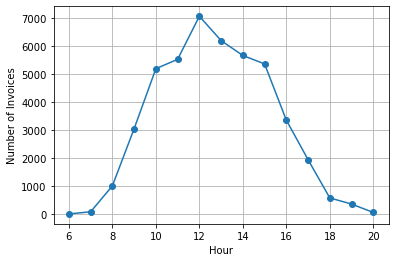

In [26]:
invoice_hr = []
for hr, df in df_invoices.groupby(['Hour']):
    invoice_hr.append([hr, len(df)])
invoice_hr = np.array(invoice_hr)
plt.plot(invoice_hr[:,0], invoice_hr[:,1], marker='o')
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Invoices')

Most of the orders (invoices) are placed around noon, which is during businees hours, again showing that the customers are mainly other businesses (wholesalers), not individuals.  

### Top 20 products in terms of total sale (most popular products)

In [27]:
data_product = []
for stockcode, df in data.groupby('StockCode'):
    data_product.append([stockcode, df['Description'].iloc[0], df['Total_Sale'].sum()])
data_product = np.array(data_product)
df_product = pd.DataFrame(data_product, columns=['StockCode','Description','Total_Sale'])
df_product['Total_Sale'] = df_product['Total_Sale'].astype('float')
df_product = df_product.sort_values('Total_Sale', ascending=False).reset_index(drop=True)

Text(0.5, 0, 'Total Sale (Â£)')

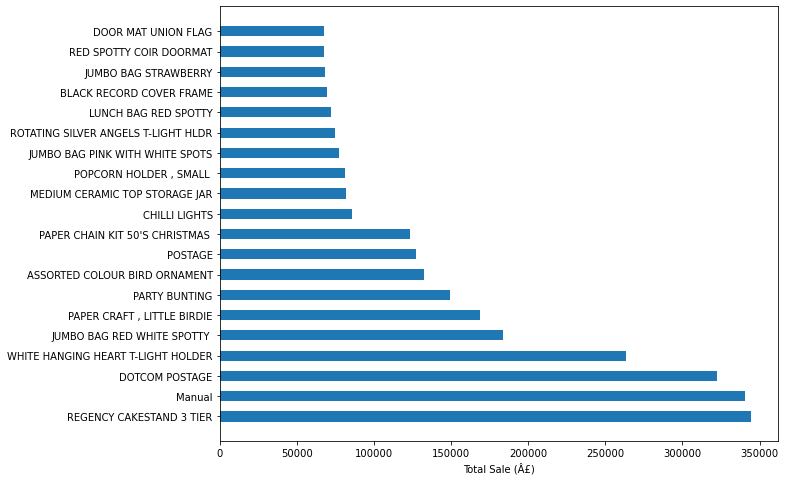

In [37]:
plt.figure(figsize=(10, 8))
plt.barh(df_product['Description'][:20], df_product['Total_Sale'][:20], 0.5)
plt.xlabel('Total Sale (Â£)')

### Top 10 customers in terms of total sales (company likes to thank them by sending gifts/promotions)

In [42]:
data_customer = []
for customer, df in data.groupby('Customer ID'):
    data_customer.append([customer, df['Total_Sale'].sum()])
data_customer = np.array(data_customer)
df_customer = pd.DataFrame(data_customer, columns=['Customer ID','Total_Sale'])
df_customer['Total_Sale'] = df_customer['Total_Sale'].astype('float')
df_customer['Customer ID'] = df_customer['Customer ID'].astype('int').astype('str')
df_customer = df_customer.sort_values('Total_Sale', ascending=False).reset_index(drop=True)
df_customer.head()

,Customer ID,Total_Sale
0,18102,608821.65
1,14646,528602.52
2,14156,313946.37
3,14911,295972.63
4,17450,246973.09


Text(0, 0.5, 'Customer ID')

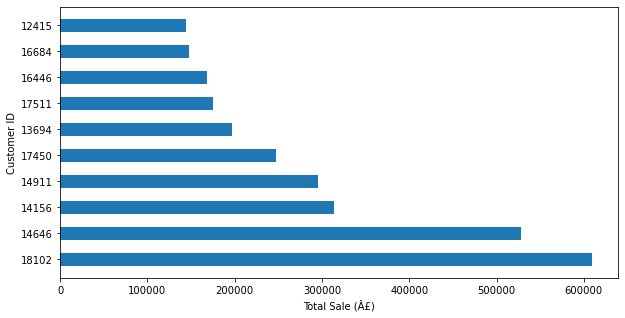

In [41]:
plt.figure(figsize=(10, 5))
plt.barh(df_customer['Customer ID'][:10], df_customer['Total_Sale'][:10], 0.5)
plt.xlabel('Total Sale (Â£)')
plt.ylabel('Customer ID')